Program Assignment 1 Machine Learning
2023-2024 odd
Create a machine-learning model based on the dataset that has been assigned to you.
You can choose either regression or classification problems on the given dataset. Your
jupyter notebook submission should include:
1. Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.
2. Data Preprocessing (10 points): Explain what are the preprocessing techniques
that you apply and why you need these techniques
3. Data Analysis (10 points): Explain your understanding of the data pattern. You
can explain the insight that you get from the data
4. Model Generation (30 points): Create your model and describe the algorithm
that you use. Explain why you chose this model
5. Model Evaluation (20 points): Explain the results of your model

Marsha Alexis Likorawung 0706012110034

Evelyn Callista Yaurentius 0706012110036

**1. Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.**


Problem and Task Understanding : The problem we want to solve is to predict weather the customer going to churn or not. This problems treated as a classification problem because : 

1. The outcome is binary: which is either the customer churn (Yes/No)
2. Classification algorithm are designed to handle categorical or discrete outcome such as predicting classes or labels
3. The model selection for machine learning would be logistic regression. Logistic prediction is used to predict the dependent variable


**Dataset Customer Churn**

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data, from marsha's github (the csv file is imported to github for easier and online access to the dataset)
url = "https://raw.githubusercontent.com/Marsh16/customer-churn/main/Customer%20Churn%20-%20Dataset.csv"
data = pd.read_csv(url)

#show all columns 
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [152]:
(data == ' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [153]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [154]:
for i in range(len(data['TotalCharges'])):
    if data['TotalCharges'][i] == ' ':
        data['TotalCharges'][i] = 0.0


/var/folders/km/hq_dmh410fx9mr054g3kg7840000gn/T/ipykernel_89075/3044360150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'][i] = 0.0


In [155]:
(data == ' ').sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [156]:
(data == 0).sum()

customerID             0
gender                 0
SeniorCitizen       5901
Partner                0
Dependents             0
tenure                11
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64

In [157]:
#hi 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [158]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [159]:
from sklearn.preprocessing import LabelEncoder
label_encoder2 = LabelEncoder()

data['gender'] = label_encoder2.fit_transform(data['gender'])
data['SeniorCitizen'] = label_encoder2.fit_transform(data['SeniorCitizen'])
data['Partner'] = label_encoder2.fit_transform(data['Partner'])
data['Dependents'] = label_encoder2.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder2.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder2.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder2.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder2.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder2.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder2.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder2.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder2.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder2.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder2.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder2.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder2.fit_transform(data['PaymentMethod']) 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['Churn'] = label_encoder2.fit_transform(data['Churn']) 
                                                                
# Show the plots
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [160]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [161]:
data.drop('customerID', inplace=True, axis=1) 
(data == 0).sum()

gender              3488
SeniorCitizen       5901
Partner             3641
Dependents          4933
tenure                11
PhoneService         682
MultipleLines       3390
InternetService     2421
OnlineSecurity      3498
OnlineBackup        3088
DeviceProtection    3095
TechSupport         3473
StreamingTV         2810
StreamingMovies     2785
Contract            3875
PaperlessBilling    2872
PaymentMethod       1544
MonthlyCharges         0
TotalCharges          11
Churn               5174
dtype: int64

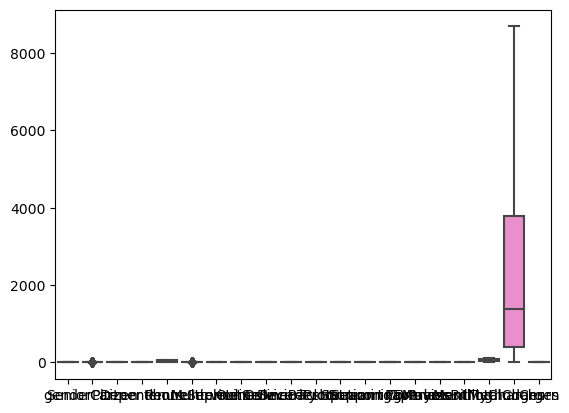

In [162]:
# Fit and transform the categorical data

sns.boxplot(data=data)
plt.show()

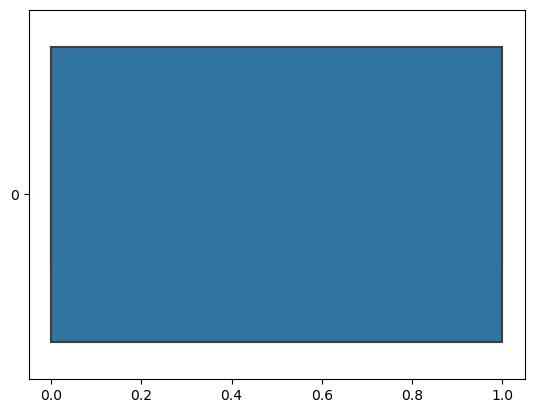

In [163]:
churnDF = data['Churn']
sns.boxplot(data=churnDF , orient='h')
plt.show()

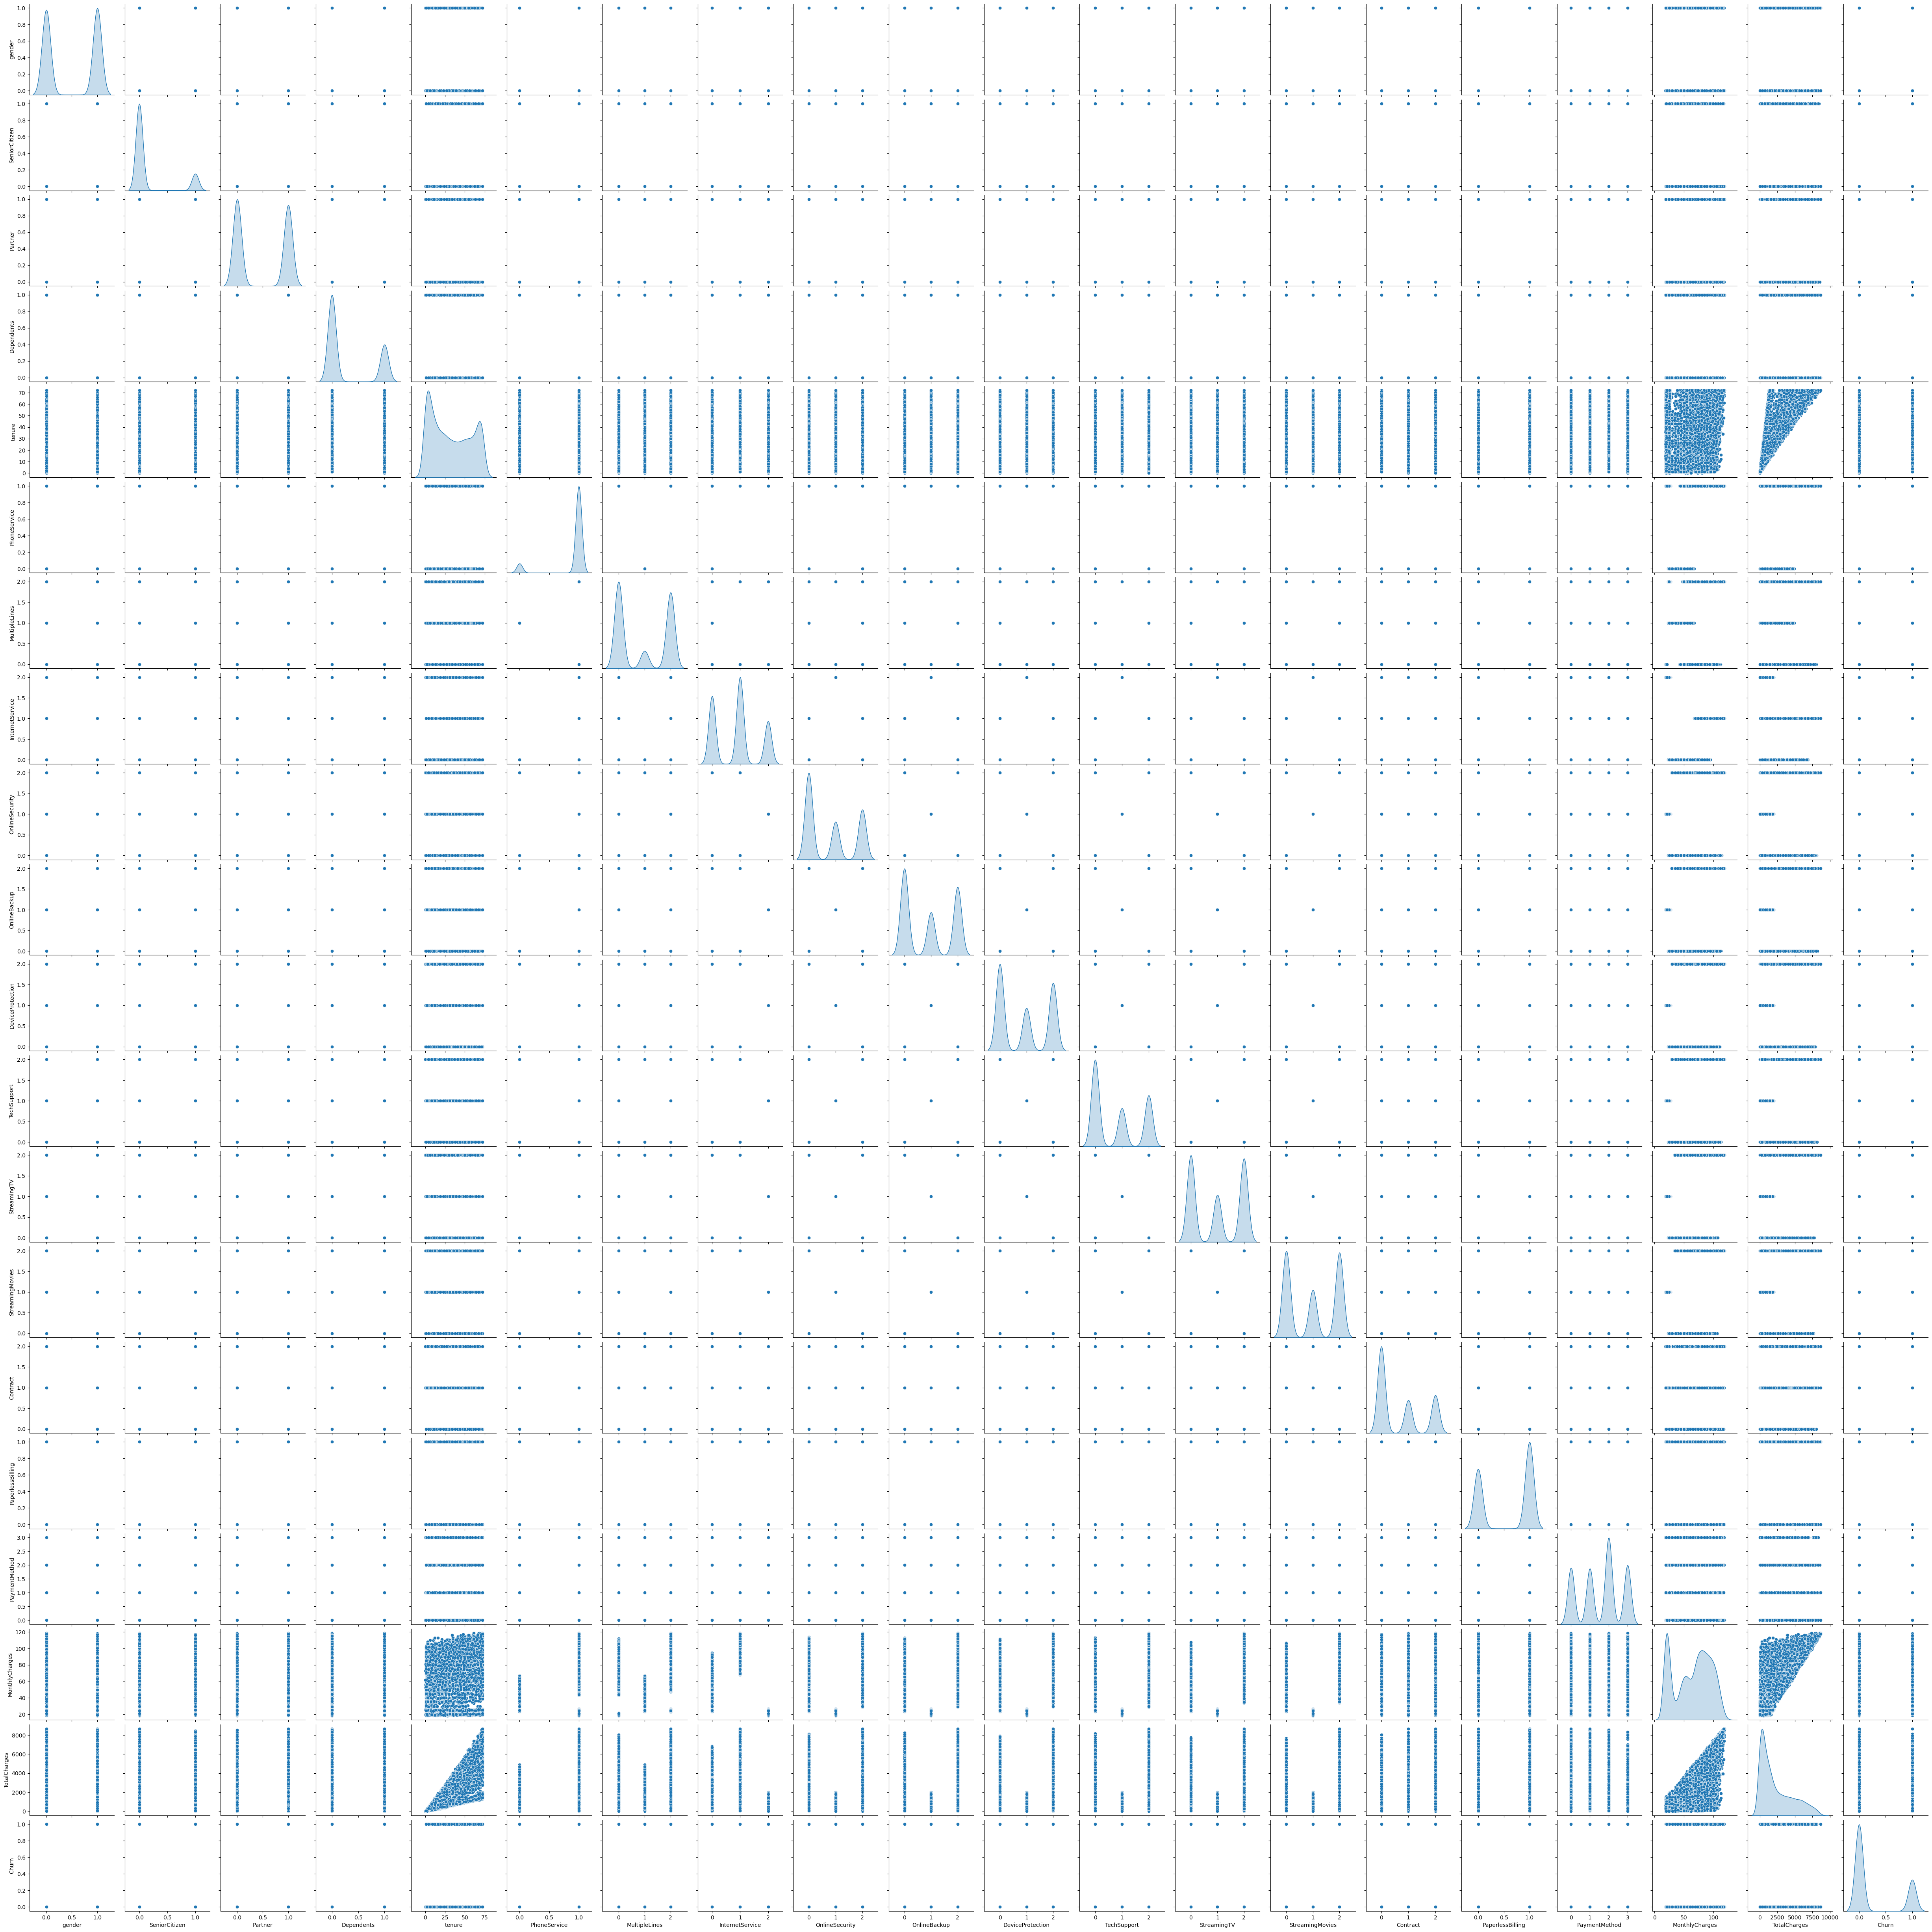

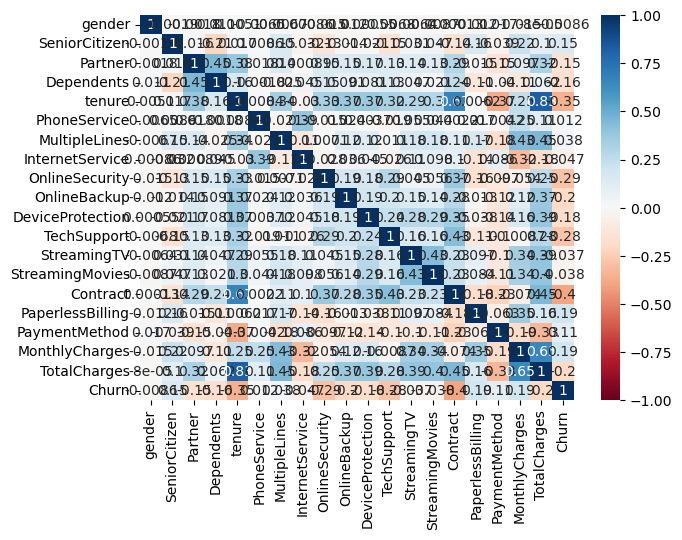

In [164]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

plt.subplots(figsize=(7,5))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

In [165]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(y)

[0 0 1 ... 0 1 0]


In [166]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [167]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
model = LogisticRegression(random_state=16)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/marshalikorawung/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [168]:
print("Intercept: {:0.4f}".format(model.intercept_))
print("Coefficient b1: {:0.4f}".format(model.coef_[0]))
print("Coefficient b2: {:0.4f}".format(model.coef_[1]))
print("Coefficient b3: {:0.4f}".format(model.coef_[2]))
print("Coefficient b4: {:0.4f}".format(model.coef_[3]))
print("Coefficient b5: {:0.4f}".format(model.coef_[4]))
print("Coefficient b6: {:0.4f}".format(model.coef_[5]))
print("Coefficient b7: {:0.4f}".format(model.coef_[6]))
print("Coefficient b8: {:0.4f}".format(model.coef_[7]))
print("Coefficient b1: {:0.4f}".format(model.coef_[8]))
print("Coefficient b2: {:0.4f}".format(model.coef_[9]))
print("Coefficient b3: {:0.4f}".format(model.coef_[10]))
print("Coefficient b4: {:0.4f}".format(model.coef_[11]))
print("Coefficient b5: {:0.4f}".format(model.coef_[12]))
print("Coefficient b6: {:0.4f}".format(model.coef_[13]))
print("Coefficient b7: {:0.4f}".format(model.coef_[14]))
print("Coefficient b8: {:0.4f}".format(model.coef_[15]))
print("Coefficient b4: {:0.4f}".format(model.coef_[16]))
print("Coefficient b5: {:0.4f}".format(model.coef_[17]))
print("Coefficient b6: {:0.4f}".format(model.coef_[18]))

print('Regression Equation: y= {:0.4f} X1 + {:0.4f} X2 + {:0.4f} X3 + {:0.4f} X4 + {:0.4f} X5 + {:0.4f} X6 + {:0.4f} X7 + {:0.4f} X8 + {:0.4f} X9 + {:0.4f} X10 + {:0.4f} X11 + {:0.4f} X12 + {:0.4f} X13 + {:0.4f} X14 + {:0.4f} X15 + {:0.4f} X16 + {:0.4f} X17 + {:0.4f} X18 + {:0.4f} X19 + {:0.4f}'
      .format(model.coef_[0], model.coef_[1],model.coef_[2],model.coef_[3],model.coef_[4],model.coef_[5],model.coef_[6],model.coef_[7],model.coef_[8],model.coef_[9],model.coef_[10],model.coef_[11],model.coef_[12],model.coef_[13],model.coef_[14],model.coef_[15],model.coef_[16],model.coef_[17],model.coef_[18], model.intercept_))

# Display the Coefficient of Determination
print('The Coefficient of Determination: {:0.4f}'.format(model.score(X, y)))

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [169]:
#Standard Scaler need to be used when the scale are different 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [170]:
# Make y prediction based on X test
y_pred = model.predict (X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,0,1
7,0,1
8,0,0
9,0,1


In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Identifying TP, TN, FP, and FN
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cm)
# Display the accuracy score
print("Accuracy Score: {:0.3f}". format (accuracy_score (y_test, y_pred) ))

Confusion Matrix
 [[858 447]
 [ 78 378]]
Accuracy Score: 0.702


In [172]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[858, 447],
       [ 78, 378]])

Text(0.5, 427.9555555555555, 'Predicted label')

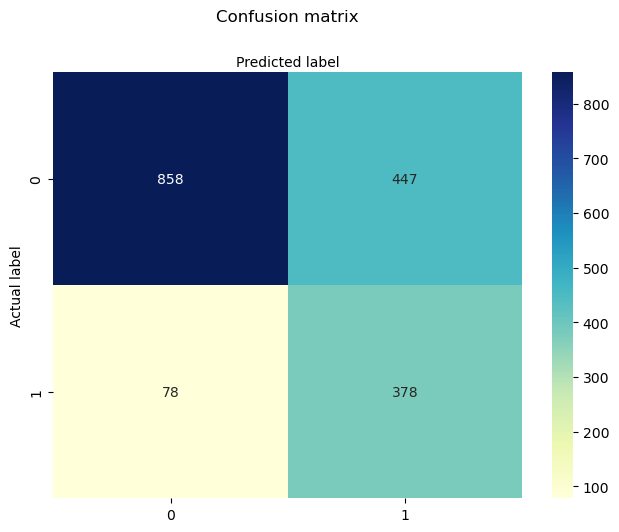

In [173]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [174]:
from sklearn.metrics import classification_report
target_names = ['not churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not churn       0.92      0.66      0.77      1305
       churn       0.46      0.83      0.59       456

    accuracy                           0.70      1761
   macro avg       0.69      0.74      0.68      1761
weighted avg       0.80      0.70      0.72      1761



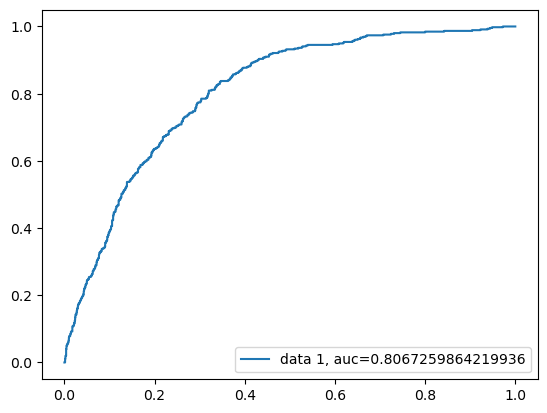

In [175]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [176]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, model.predict_proba(X_test))
logloss
#the lower the better 

0.5837327124223649